In [1]:
library('tidyverse')

Income = read_csv('https://raw.githubusercontent.com/rcjones9/Budget/main/JVG_df.csv', col_types = cols()) |>
    select(Role, Month, Date, Day, Shift, Time, Rate, Tips, Total) |> na.omit()

Income = subset(Income, Role=='Barista')

tail(Income)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
New names:
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`


Role,Month,Date,Day,Shift,Time,Rate,Tips,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Barista,August,8/28/23,Monday,Open,369.6,12,62.71,136.63
Barista,September,9/18/23,Monday,Close,343.2,12,42.77,111.41
Barista,September,9/17/23,Sunday,Close,400.2,12,59.35,139.39
Barista,September,9/16/23,Saturday,Close,349.2,12,46.55,116.39
Barista,September,9/15/23,Friday,Close,348.6,12,44.89,114.61
Barista,September,9/11/23,Monday,Close,358.2,12,43.19,114.83


Shift,N
<chr>,<int>
Close,111
Open,91
Mid,46
N/A,1


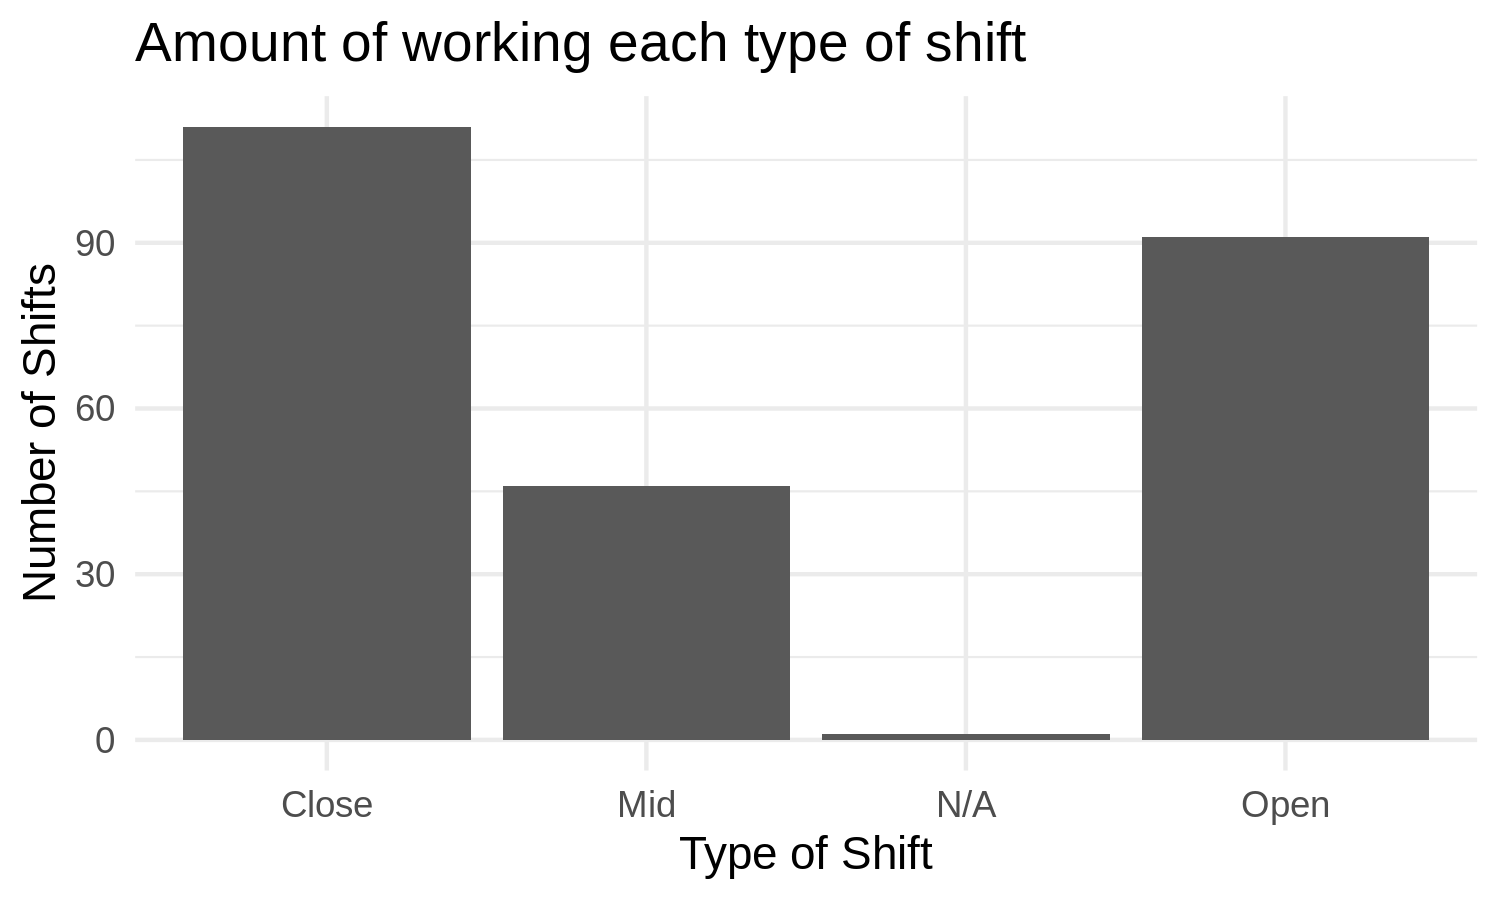

In [2]:
options( repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 300)

Income |>
    group_by(Shift) |>
    summarize(N = n()) |>
    arrange(desc(N))

p1 = ggplot(Income, aes(x=Shift)) +
    geom_bar() +
    labs(title = "Amount of working each type of shift", x = "Type of Shift", y = "Number of Shifts") +
    theme_minimal()
p1

## I have not worked very many mid shifts! Mostly opening.

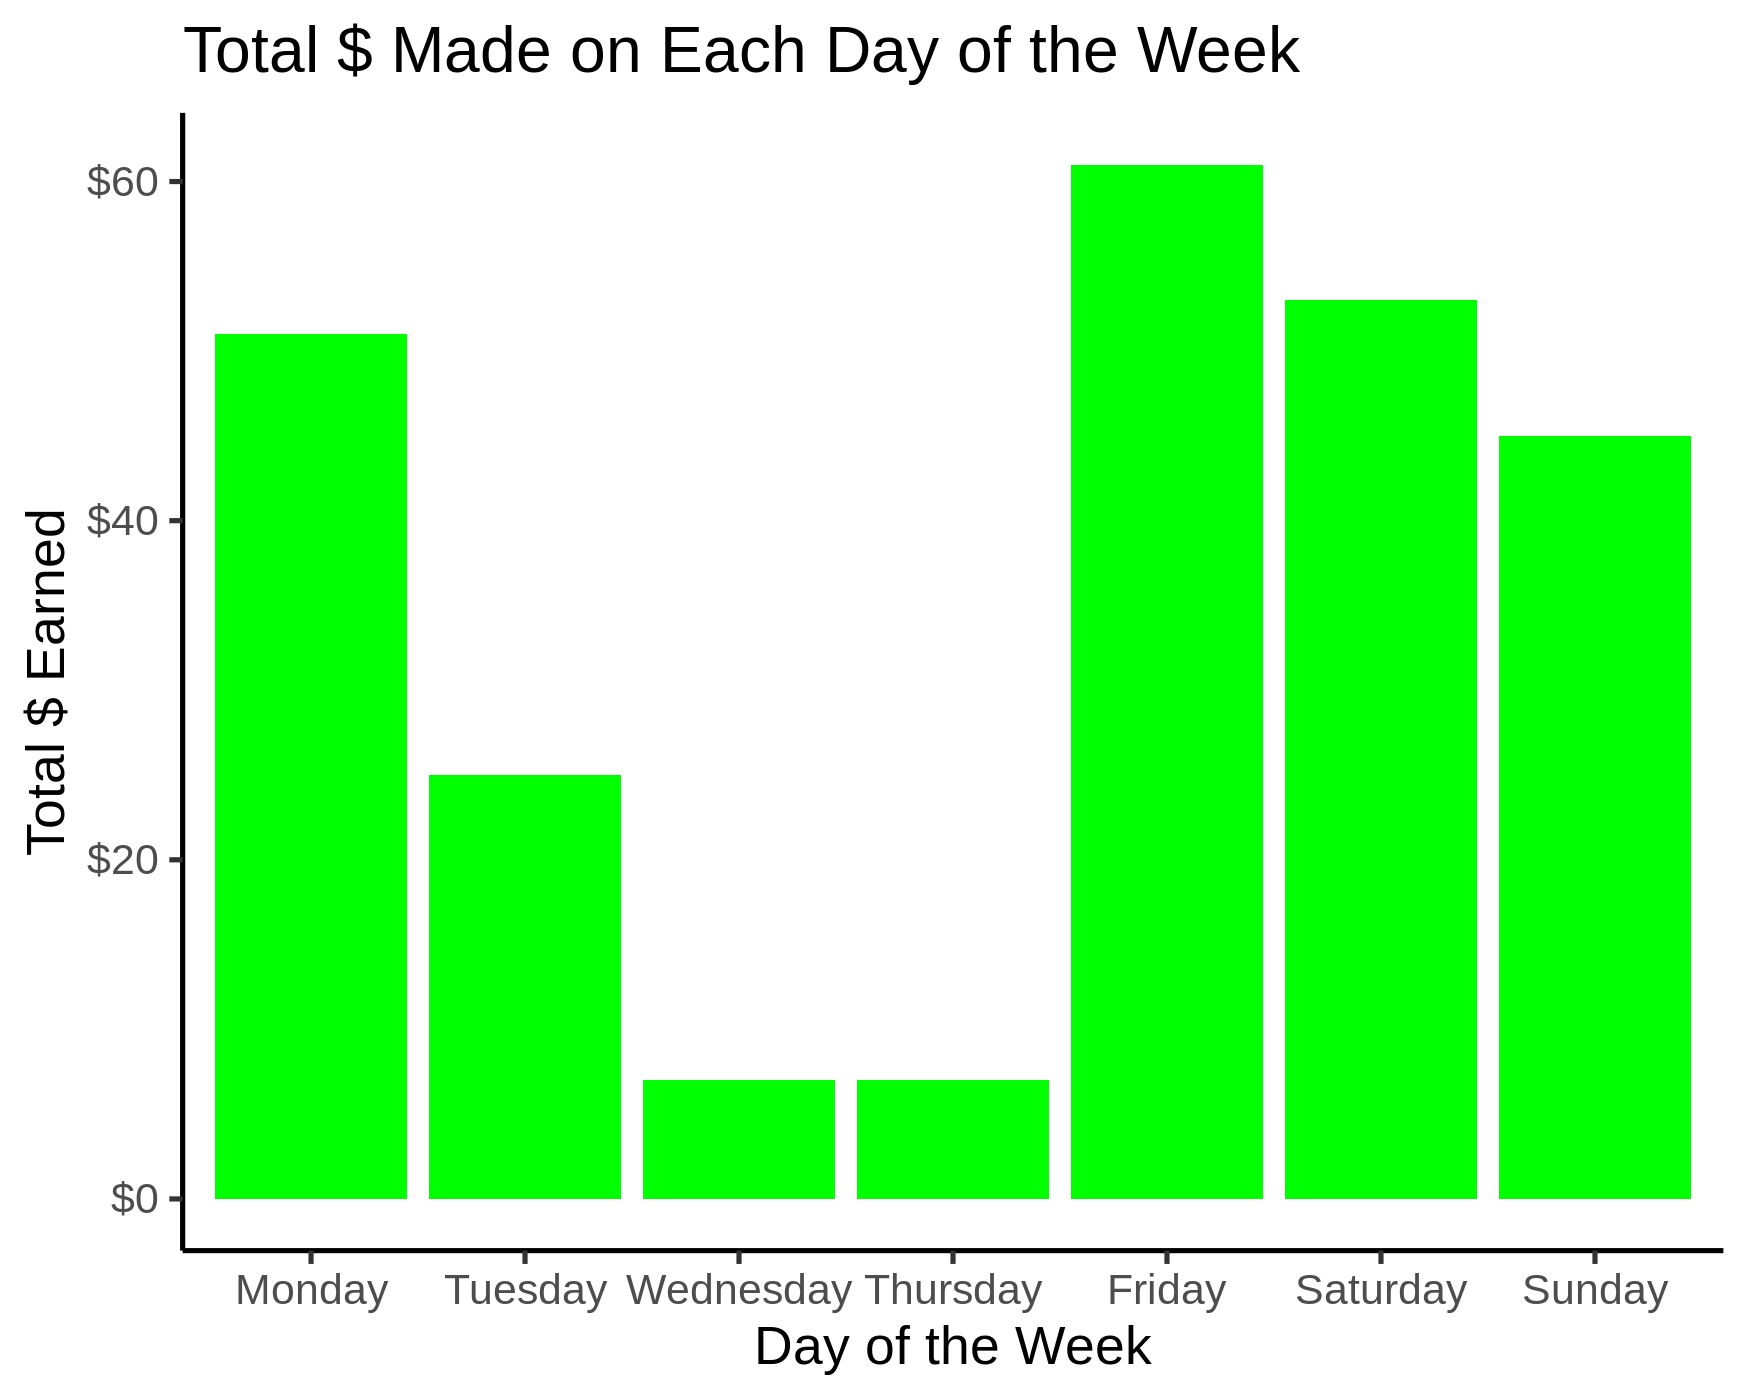

In [3]:
options(repr.plot.width=5, repr.plot.height=4, repr.plot.res = 350)

Income_week = Income |>
    mutate( Day_sorted = Day |> 
           fct_relevel('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
          )

p2 = ggplot(Income_week, aes(x=Day_sorted)) +
    theme_classic() +
    geom_bar(fill = 'green') +
    labs(title = "Total $ Made on Each Day of the Week", x = "Day of the Week", y = "Total $ Earned") +
    scale_y_continuous(labels = scales::dollar)

p2

## I have worked more on the weekends, so this is less accurate than averaged tips earned!

In [4]:
#Income_Ordered = Income$Day <- factor(Income$Day, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

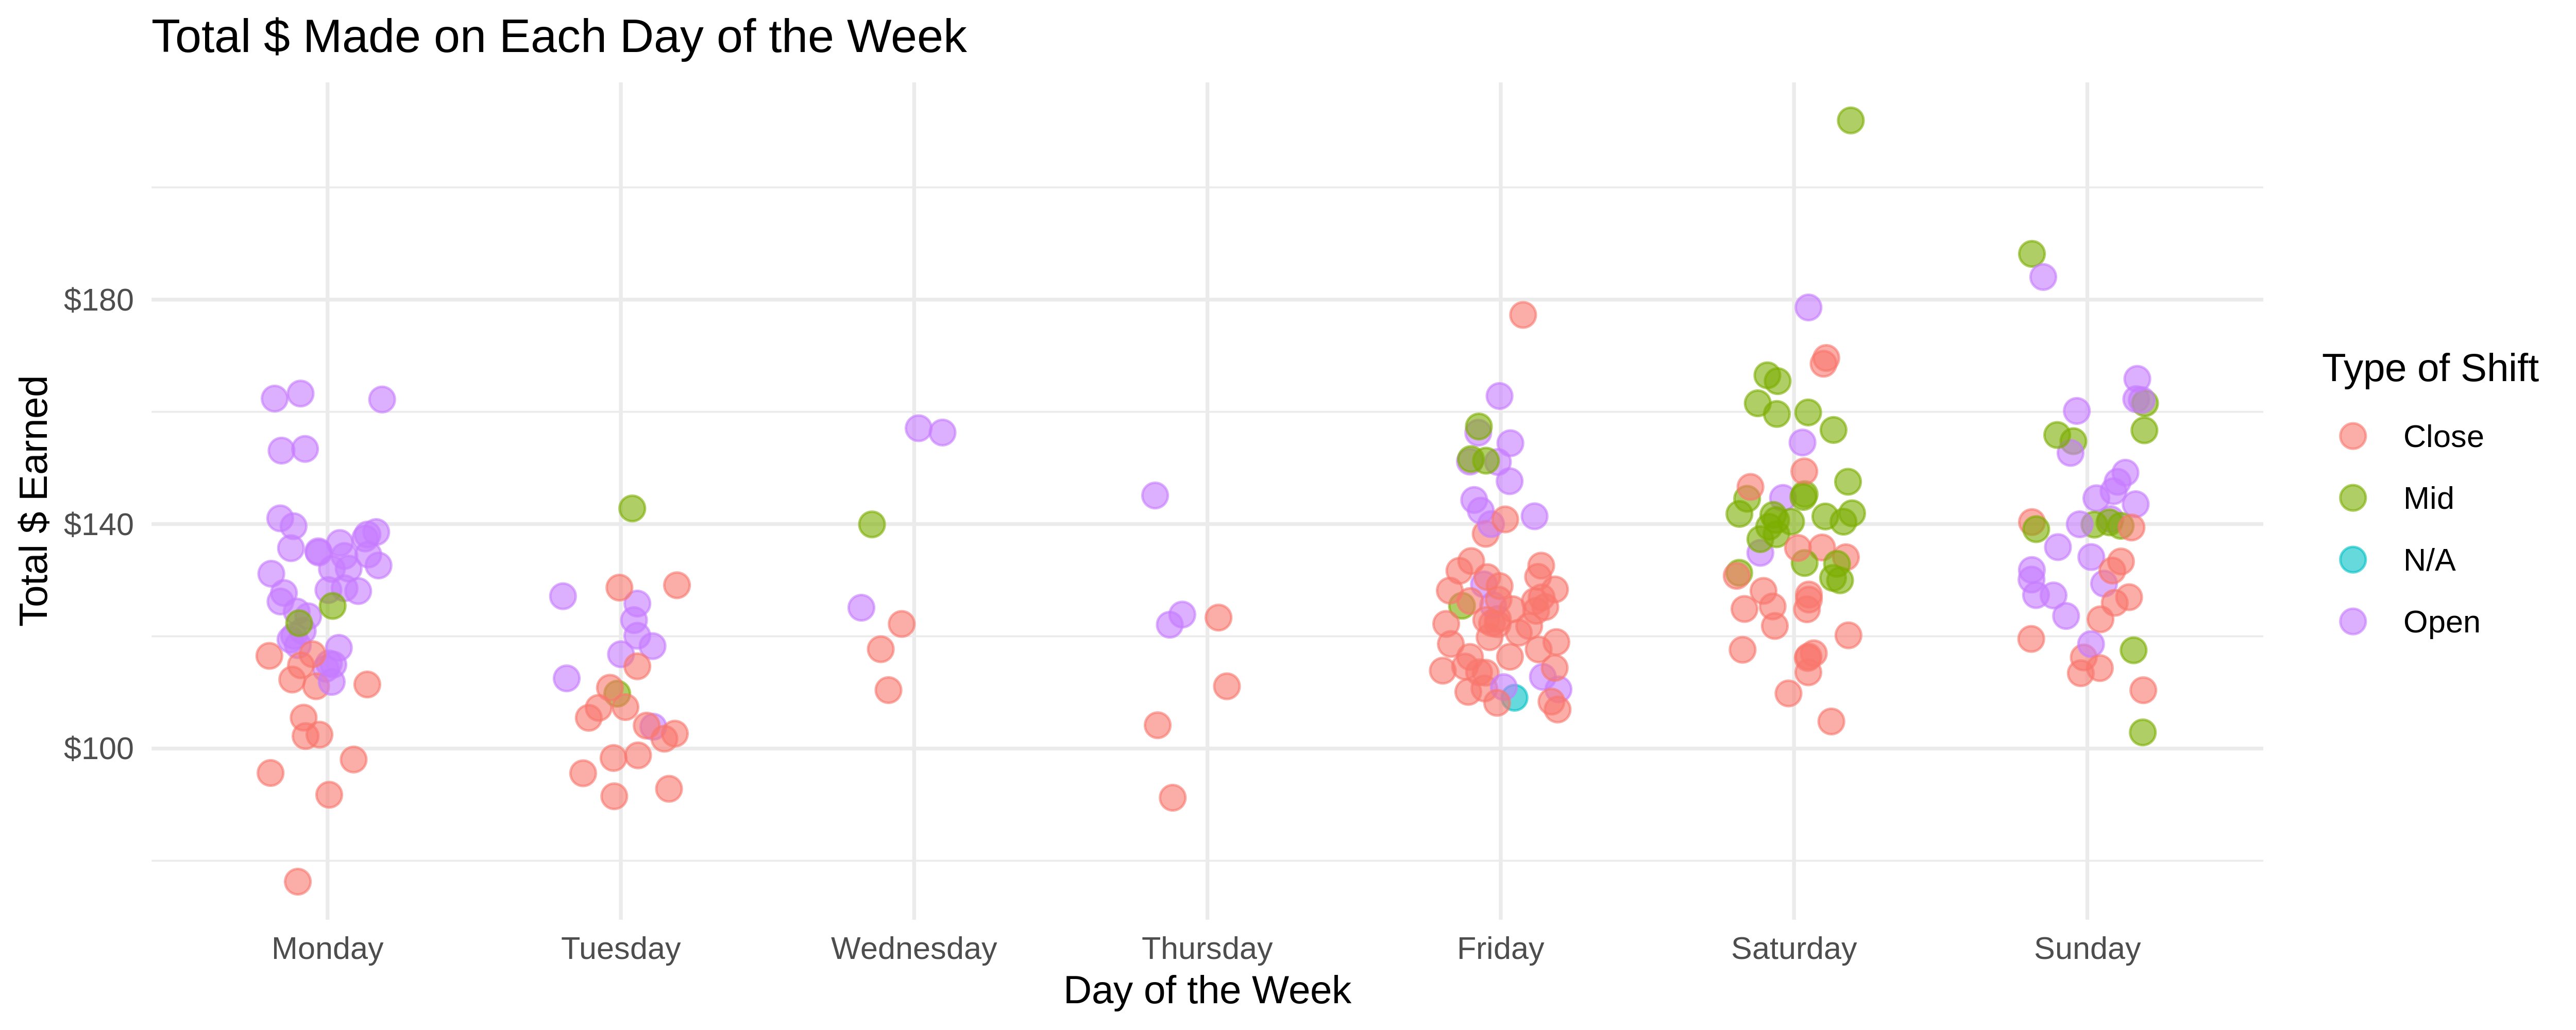

In [5]:
options( repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 500)


p3 = ggplot(Income_week, aes(x = Day_sorted, y = Total, color = Shift)) +
    geom_point(position = position_jitter(w=0.2, h=0), alpha=0.6, size=3) +
    labs(title = "Total $ Made on Each Day of the Week", x = "Day of the Week", y = "Total $ Earned", color = "Type of Shift") +
    scale_y_continuous(labels = scales::dollar) +
    theme_minimal()

p3

## I have made the most money on weekend opening shifts, but the few mid shifts that I have done were very lucrative too.

### Note to self: Remove the Saturday outlier in a duplicate scatter plot.

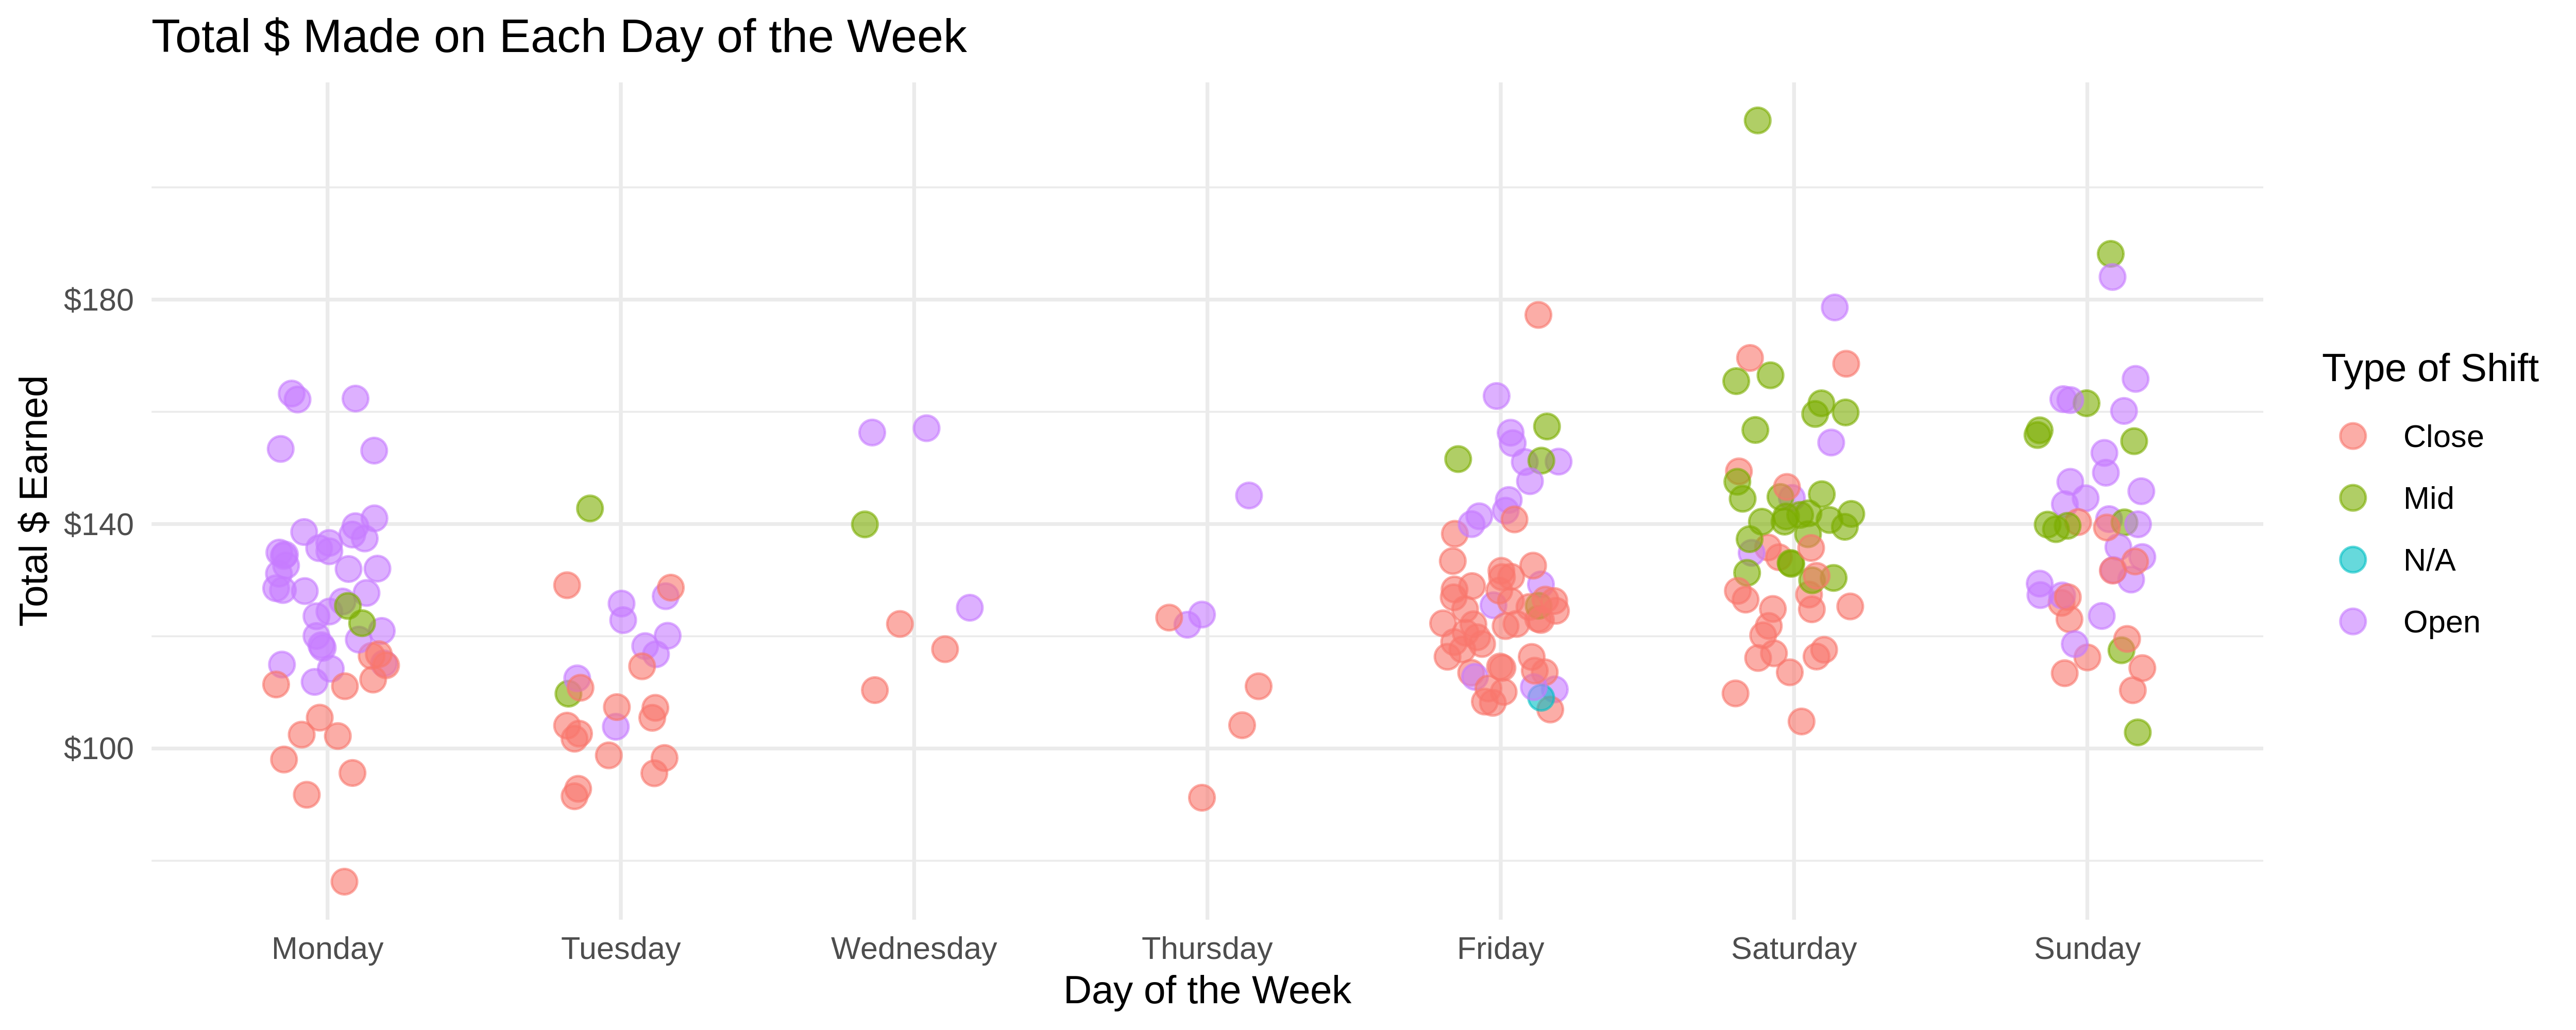

In [6]:
options( repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 500)


p3 = ggplot(Income_week, aes(x = Day_sorted, y = Total, color = Shift)) +
    geom_point(position = position_jitter(w=0.2, h=0), alpha=0.6, size=3) +
    labs(title = "Total $ Made on Each Day of the Week", x = "Day of the Week", y = "Total $ Earned", color = "Type of Shift") +
    scale_y_continuous(labels = scales::dollar) +
    theme_minimal()

p3

In [7]:
Income_days = Income |>
    group_by(Day) |>
    summarize(N = n()) |>
    arrange(desc(N))

Income_days

Day,N
<chr>,<int>
Friday,61
Saturday,53
Monday,51
Sunday,45
Tuesday,25
Thursday,7
Wednesday,7


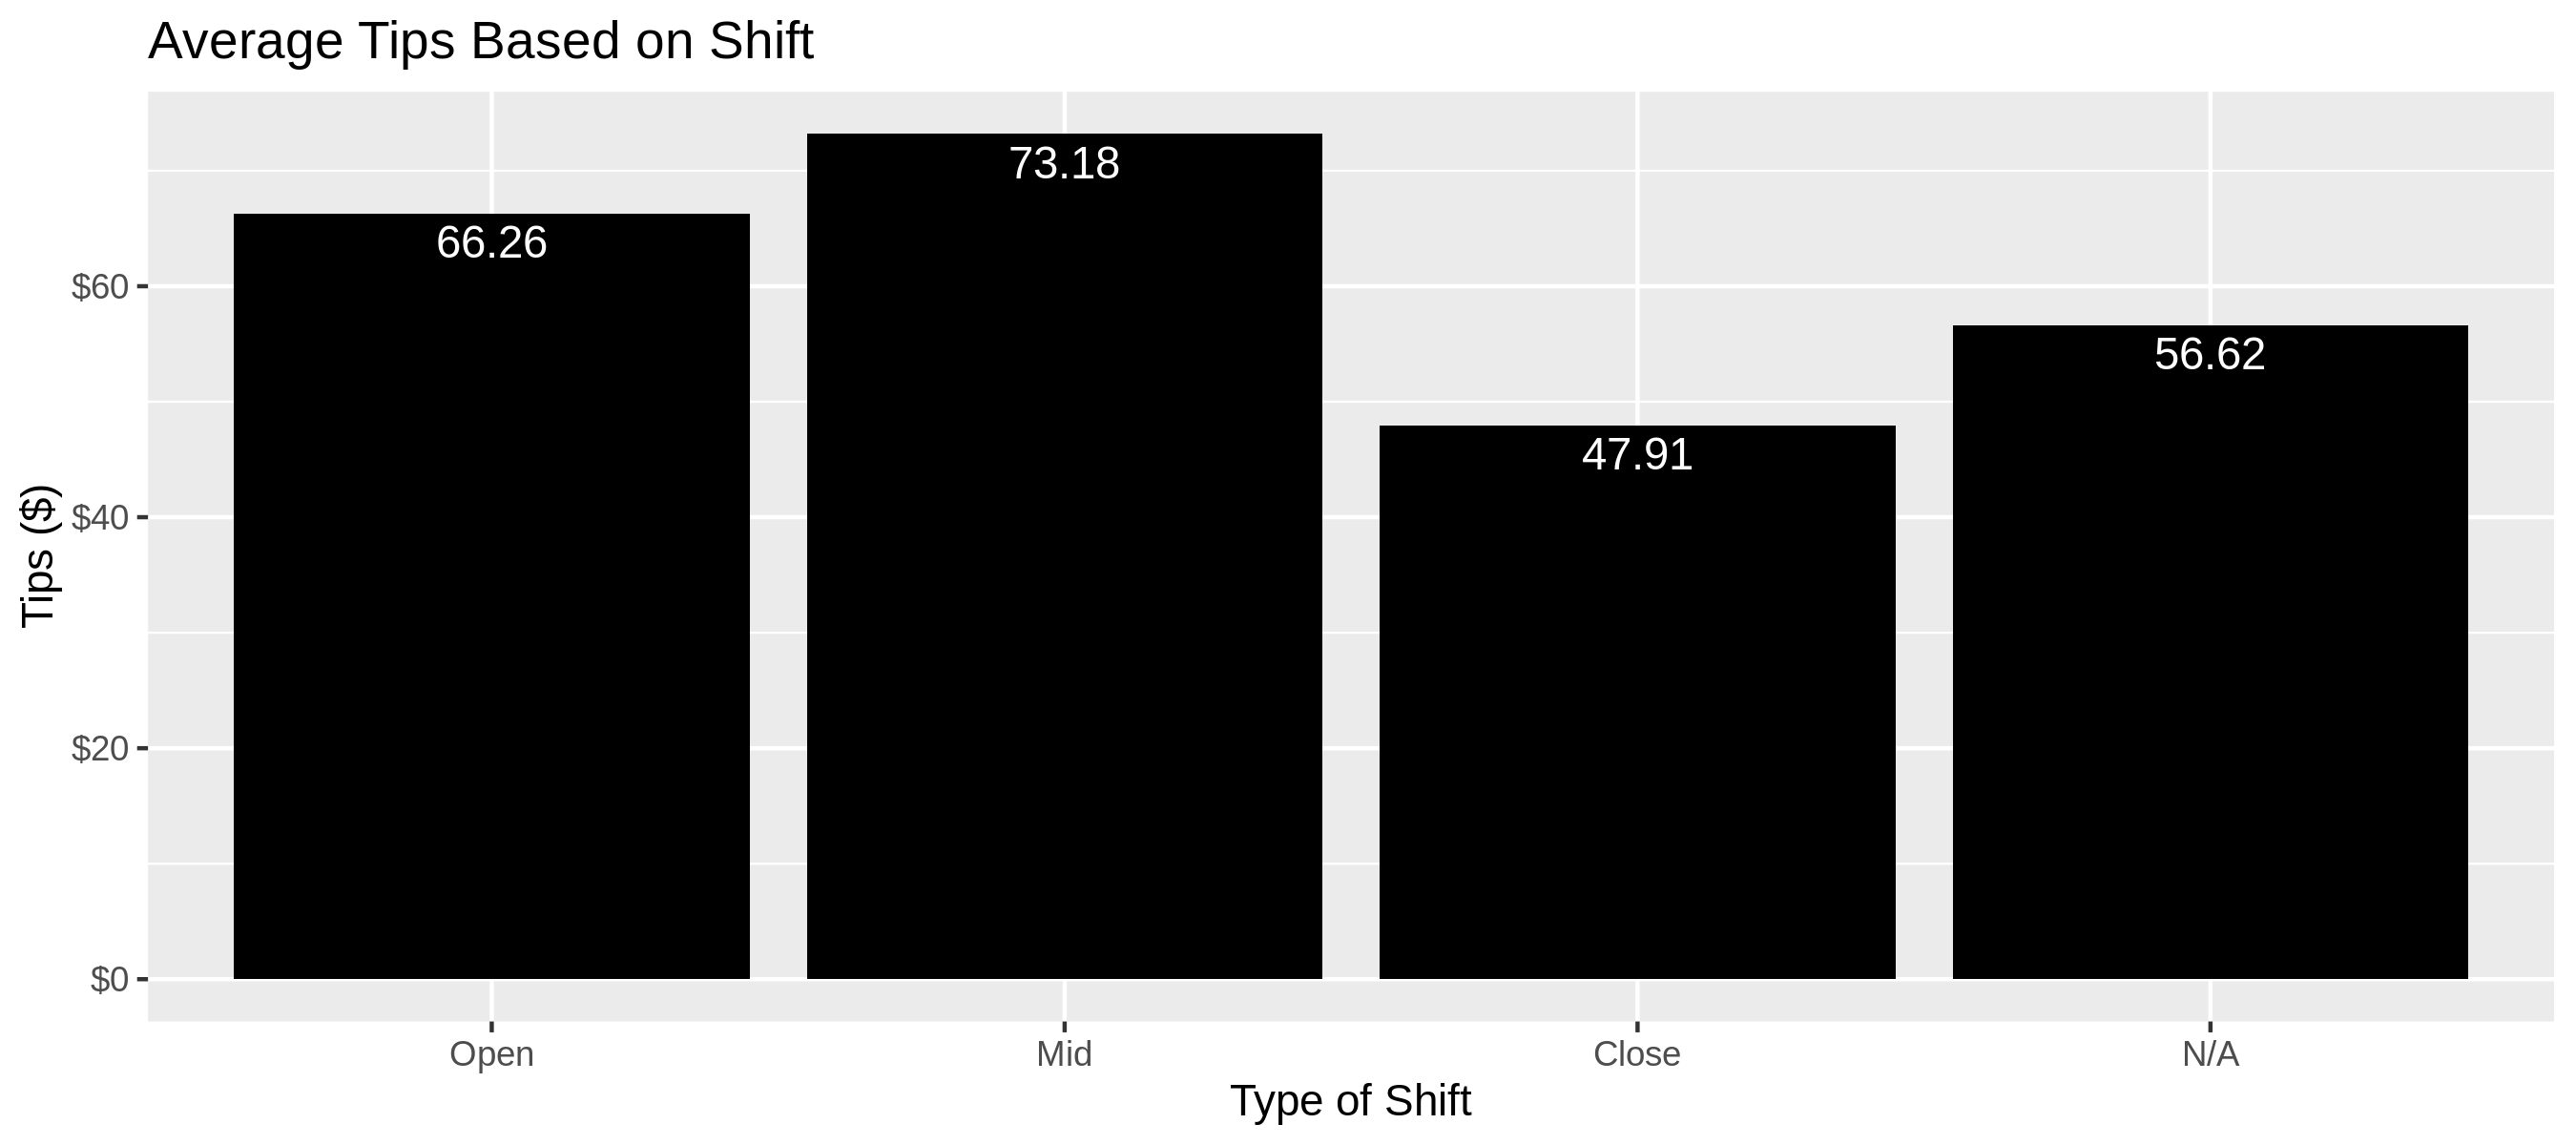

In [8]:
options( repr.plot.width = 9, repr.plot.height = 4, repr.plot.res = 300)

Income_shift = Income |>
    group_by(Shift) |>
    summarize( Tips = mean(Tips)) |>
    mutate( Shift_sorted = Shift |> 
           fct_relevel('Open', 'Mid', 'Close'))

p4 = ggplot( data = Income_shift, aes(x = Shift_sorted, y= Tips)) +
    geom_col(na.rm = FALSE, fill = "black") +
    geom_text(color = 'white', vjust = 1.4, size = 4, aes(label = round(Tips, digits=2))) +
    labs(title = "Average Tips Based on Shift", x = "Type of Shift", y = "Tips ($)") +
    scale_y_continuous(labels = scales::dollar)


p4

## This is proof that I have made more money during mid shifts than opening or closing!

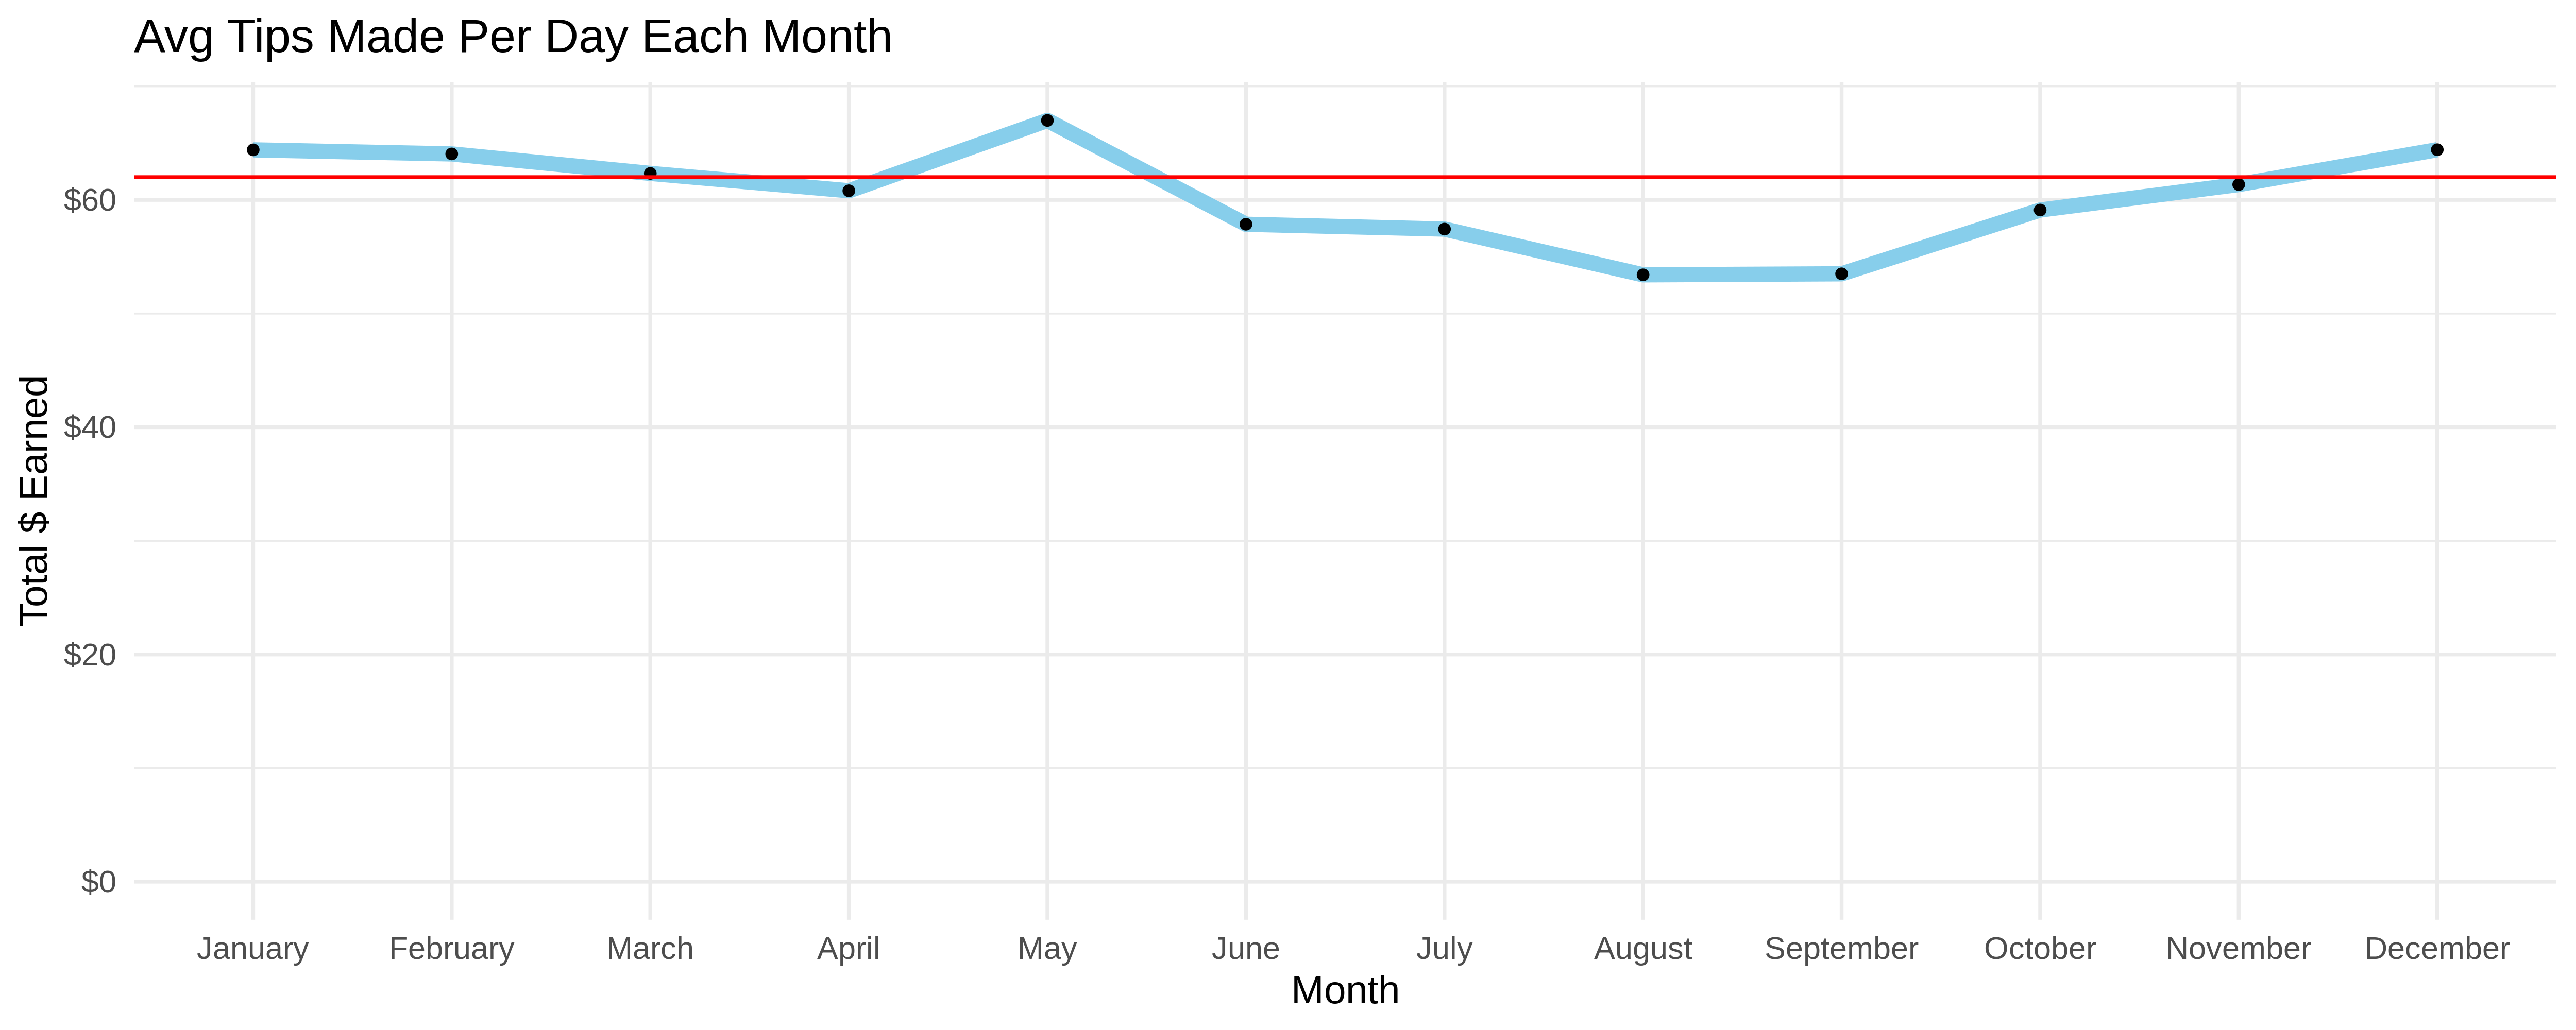

In [9]:
options( repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 500)

Income$Month = factor(Income$Month, levels = month.name)

avg_tips2 = Income |>
    group_by(Month) |>
    summarize( Tips = mean(Tips))

p5 = ggplot(avg_tips2, aes(x = Month, y = Tips, group=1)) +
    geom_line(color='sky blue', linewidth = 2) +
    geom_point(size = 1) +
    labs(title = "Avg Tips Made Per Day Each Month", x = "Month", y = "Total $ Earned") +
    scale_y_continuous(labels = scales::dollar) +
    theme_minimal() +
    expand_limits(y=0) +
    geom_hline(yintercept=62, color='red')

p5

## The overall average for daily tips has been highest in the winter (December through March). The next line graph is the same data, just zoomed in to make the comparisons more visible. May might be an outlier.

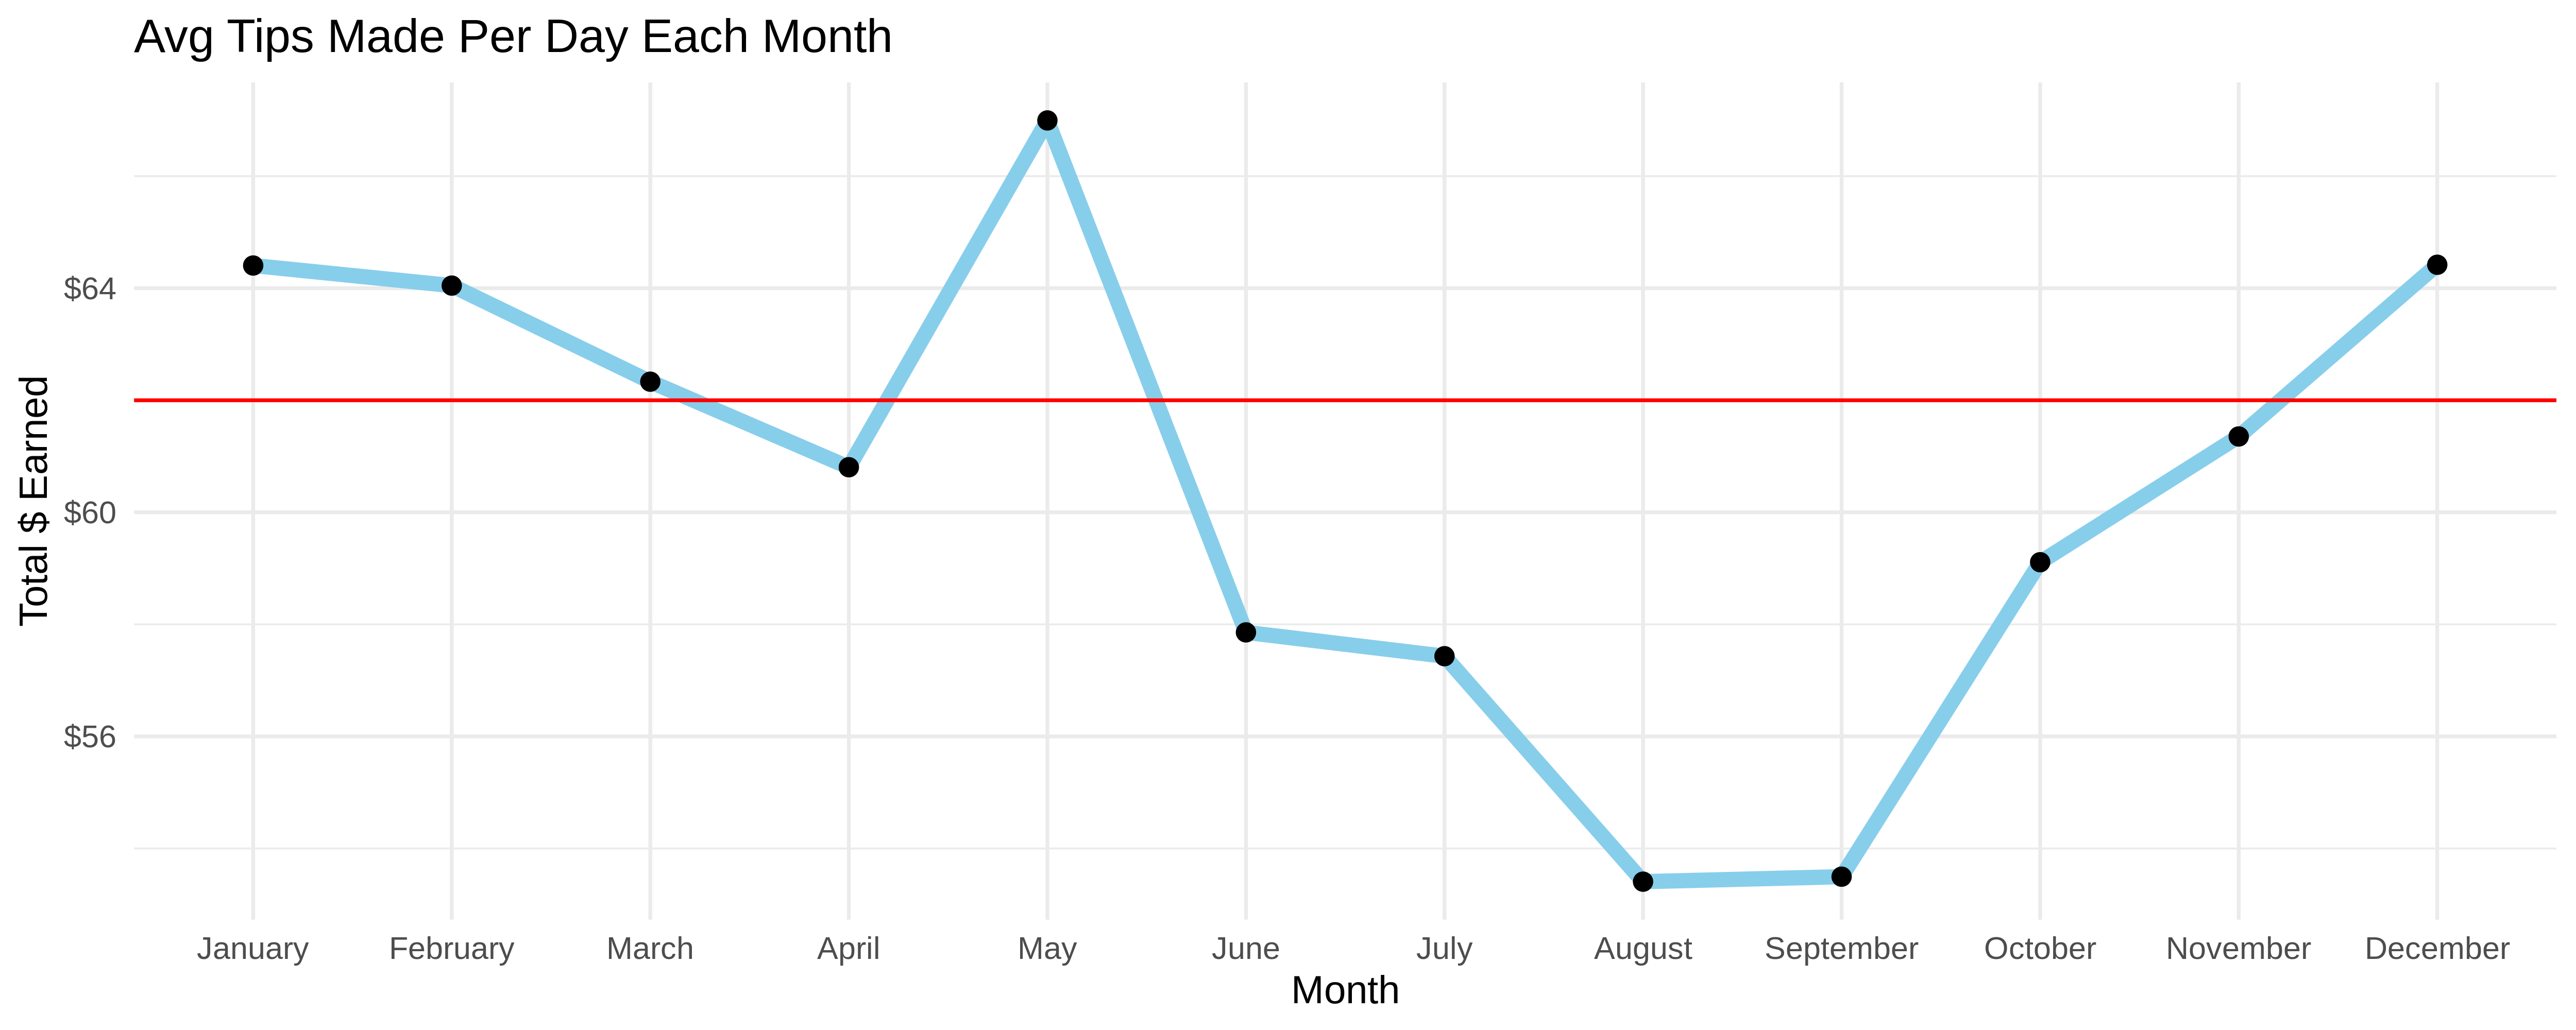

In [10]:
options( repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 500)

Income$Month = factor(Income$Month, levels = month.name)

avg_tips2 = Income |>
    group_by(Month) |>
    summarize( Tips = mean(Tips))

p5 = ggplot(avg_tips2, aes(x = Month, y = Tips, group=1)) +
    geom_line(color='sky blue', linewidth = 2) +
    geom_point(size = 2) +
    labs(title = "Avg Tips Made Per Day Each Month", x = "Month", y = "Total $ Earned") +
    scale_y_continuous(labels = scales::dollar) +
    theme_minimal() +
    geom_hline(yintercept=62, color='red')

p5